In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import math


In [2]:
def find_similar(points):
    similar = []
    for j,point_j in enumerate(points.T):
        similar_j = []
        for i,point_i in enumerate(points.T):
            if (math.isclose(point_i[3], point_j[3],rel_tol = 1e-3)):
                if i != j:
                    similar_j.append(i)
        similar.append(similar_j)
    return similar
                    

In [3]:
def find_one_similar(points):
    for j,point_j in enumerate(points.T):
        similar = []
        for i,point_i in enumerate(points.T):
            if (math.isclose(point_i[3], point_j[3],rel_tol = 1e-3)):
                if i != j:
                    similar.append(i)
        if len(similar) >= 3:
            return similar
    print("no large enough set of similar points found")
    return []
            


In [4]:

def rotation_matrix_arbitrary_axis(axis, angle):
    """
    Returns a 3D rotation matrix for rotating around an arbitrary axis by a given angle (in radians).
    
    :param axis: A 3D unit vector representing the axis of rotation (array-like or list).
    :param angle: The angle in radians by which to rotate.
    :return: A 3x3 rotation matrix.
    """
    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)  # Ensure the axis is a unit vector
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    one_minus_cos = 1 - cos_theta
    
    # Skew-symmetric matrix of the axis
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Outer product of the axis
    outer_product = np.outer(axis, axis)
    
    # Rotation matrix using Rodrigues' formula
    R = cos_theta * np.eye(3) + one_minus_cos * outer_product + sin_theta * K
    
    return R

def rotate_vector_arbitrary_axis(vector, axis, angle):
    """
    Rotates a 3D vector around an arbitrary axis by a given angle (in radians).
    
    :param vector: A 3D vector to rotate (as a list or numpy array).
    :param axis: A 3D unit vector representing the axis of rotation.
    :param angle: The angle in radians by which to rotate the vector.
    :return: The rotated 3D vector.
    """
    rot_matrix = rotation_matrix_arbitrary_axis(axis, angle)
    rotated_vector = np.dot(rot_matrix, vector)
    return rotated_vector

In [5]:
# Ball:
# rotate pointset
cm = plt.get_cmap("RdYlGn")


res = 10

# Make data
phis = np.linspace(1e-3, np.pi/2-1e-3, res)
thetas = np.linspace(1e-3, np.pi/2-1e-3, res)
x,y,z,ref = np.empty((0)), np.empty((0)),np.empty((0)), np.empty((0))

for phi in phis:
    for theta in thetas:
        x =  np.append(x,np.cos(phi)*np.sin(theta))
        y =  np.append(y,np.sin(phi)*np.sin(theta))
        z =  np.append(z,np.cos(theta))
        ref = np.append(ref,abs(np.cos(theta)))

# rotate and stack the points
points = np.vstack((np.vstack((x,y)),z))

ref_grid = np.vstack((points,ref))

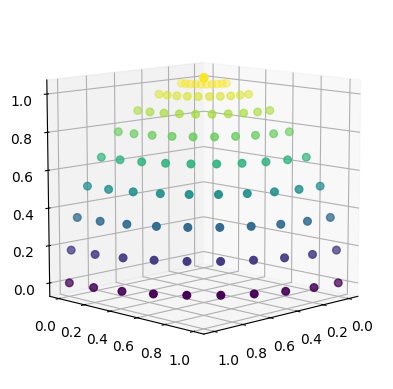

In [6]:

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(ref_grid[0,:], ref_grid[1,:], ref_grid[2,:], s=30, c=ref_grid[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show() 

In [7]:
# make random axis ang angle 
import random

r_axis = np.asarray([np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1))])
r_angle = random.uniform(0,1.5708)

rot_mat = rotation_matrix_arbitrary_axis(r_axis, r_angle)
points = rot_mat@points[:,:]

# for point in points.T[:,:]:
#     print(point)
    
# # now evaluate points according to z-value 

col = np.empty((0))
for point in points.T:
        col = np.append(col,np.abs( point[2]))


# now stack
grid = np.vstack((points,col))



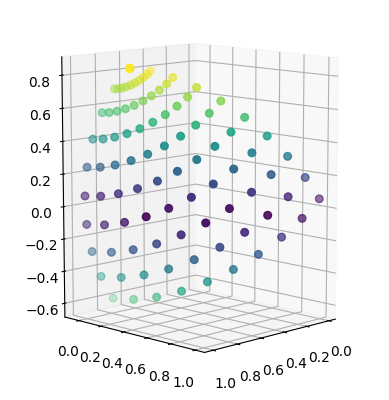

In [8]:
cutoff = points.shape[1]

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o')                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)


plt.show() 

In [9]:
similar_points = find_similar(grid)
# for i,similar in enumerate(similar_points):
#     print(i, similar)

In [10]:
longitudinal = []
for i in similar_points[0]:
    longitudinal.append(grid.T[i,:])

longitudinal = np.asarray(longitudinal)

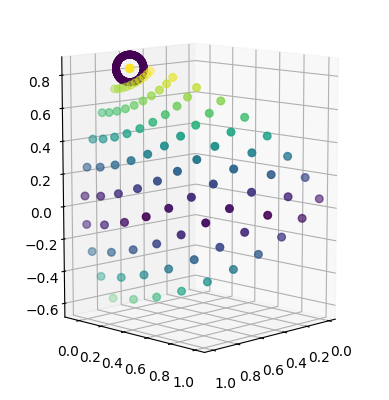

In [11]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o',zorder=-99)                                                                                
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

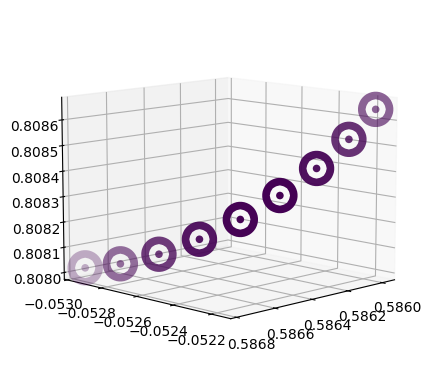

In [12]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

In [13]:
f = open("grid.txt", "a")

with open("grid.txt", "w") as f:
    for point in grid.T:
        print(*point, sep = ' ', file=f)
with open("longitudinal.txt", "w") as f:
    for point in longitudinal:
        print(*point, sep = ' ', file=f)

In [14]:
similar_points = find_one_similar(grid)

In [15]:
longitudinal = []
for i in similar_points:
    longitudinal.append(grid.T[i,:])

longitudinal = np.asarray(longitudinal)

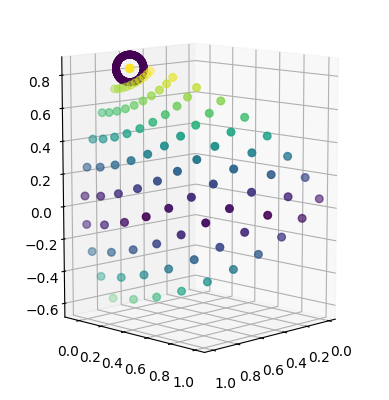

In [16]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o',zorder=-99)                                                                                
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

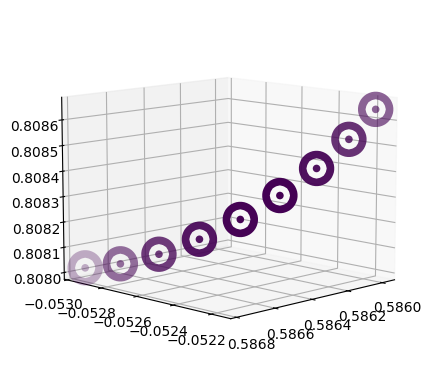

In [17]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show() 

In [18]:
a = longitudinal[0,:-1]
b = longitudinal[1,:-1]
c = longitudinal[2,:-1]

# a = np.array((1,0,1))
# b = np.array((1,1,1))
# c = np.array((1,1,0))

# print(a,b,c)
# print((a-b)/np.linalg.norm(a-b),(b-c)/np.linalg.norm(b-c))

n = np.cross(a-c,b-a)
n = n/np.linalg.norm(n)


print(n@(a-c)/(np.linalg.norm(a-c)))
print(f"normalvector: {n/np.linalg.norm(n)}")
print(f"rotmat@z    : {rot_mat@np.asarray([0,0,1])}")

rot_mat_2 = rotation_matrix_arbitrary_axis(np.cross(n,np.asarray([0,0,1])), -np.arccos(np.dot(n,np.asarray([0,0,1]))/(np.linalg.norm(n))))
points = rot_mat_2@points[:,:]

print(rot_mat@rot_mat_2)

col = np.empty((0))
for point in points.T:
        col = np.append(col,np.abs( point[2]))

grid = np.vstack((points,col))


7.814439430537114e-17
normalvector: [ 0.58597208 -0.05315871  0.80858572]
rotmat@z    : [ 0.58597207 -0.05315871  0.80858571]
[[ 0.31325587  0.05638375  0.94799346]
 [ 0.06821266  0.9943216  -0.08167947]
 [-0.94721579  0.09025172  0.307631  ]]


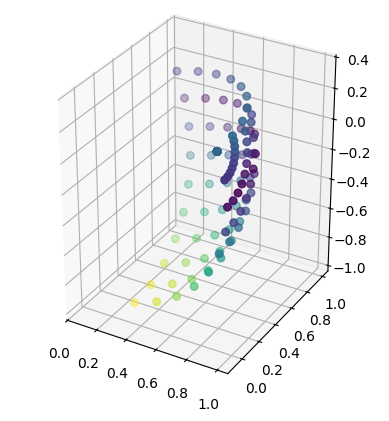

In [19]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o',zorder=-99)                                                                                
ax3D.set_aspect('equal')
#ax3D.view_init(elev=10., azim=90)

plt.show() 